In [4]:
pip install mediapipe opencv-python


Note: you may need to restart the kernel to use updated packages.


Number of people detected: 6


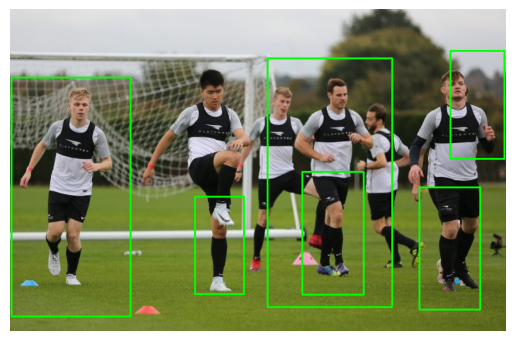

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'player.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load image.")
else:
    # Convert the image to grayscale (HOG requires grayscale image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained HOG descriptor and SVM detector for people
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect people in the image
    boxes, weights = hog.detectMultiScale(gray_image, winStride=(8, 8), padding=(8, 8), scale=1.05)

    # Draw rectangles around the detected people
    person_count = len(boxes)
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding boxes

    # Output the number of detected people
    print(f"Number of people detected: {person_count}")

    # Display the image with detected people
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


Number of faces detected: 3


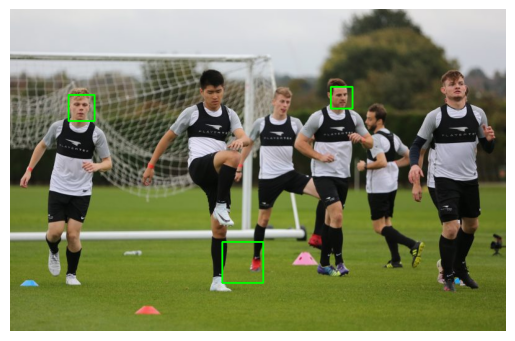

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'player.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load image.")
else:
    # Convert the image to grayscale (Haar Cascade requires grayscale image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained Haar Cascade Classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected faces
    face_count = len(faces)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding boxes for faces

    # Output the number of faces detected
    print(f"Number of faces detected: {face_count}")

    # Display the image with detected faces
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [28]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Load the image
image_path = "player.jpeg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image
results = pose.process(image_rgb)

# Draw landmarks on the image
if results.pose_landmarks:
    for landmark in results.pose_landmarks.landmark:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
else:
    print("No players detected")

# Display the result
cv2.imshow("Player Tracking", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
